<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/Logistic_vs_linear_regression_for_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

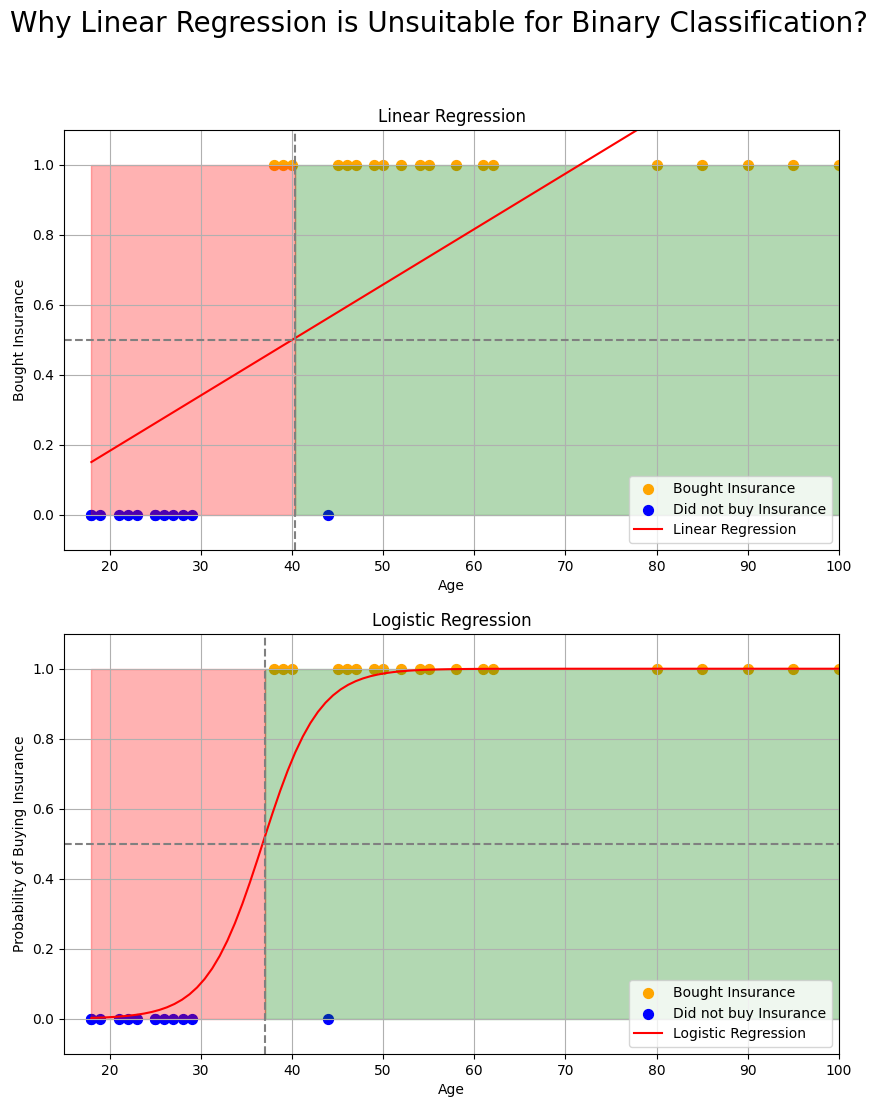

In [1]:
#ignore worning
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression, LogisticRegression


# Sample data
data = pd.DataFrame({
    'age': [22, 25, 47, 52, 46, 38, 44, 39, 62, 61, 18, 28, 27, 29, 49, 55, 25, 58, 19, 18, 21, 26, 40, 45, 50, 54, 23],
    'bought_insurance': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
})

# Outliers
outliers = pd.DataFrame({
    'age': [80, 85, 90, 95, 100],
    'bought_insurance': [1, 1, 1, 1, 1]
})

# Initial plot setup
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
x_values = np.linspace(data['age'].min(), data['age'].max(), 100)

def update_linear(frame):
    ax1.clear()
    current_data = pd.concat([data, outliers.iloc[:frame]], ignore_index=True)
    X = current_data[['age']]
    y = current_data['bought_insurance']
    model = LinearRegression()
    model.fit(X, y)
    x_values = np.linspace(current_data['age'].min(), current_data['age'].max(), 100)
    y_pred = model.predict(x_values.reshape(-1, 1))

    ax1.scatter(current_data[current_data['bought_insurance'] == 1]['age'],
               current_data[current_data['bought_insurance'] == 1]['bought_insurance'],
               c='orange', label='Bought Insurance', s=50)
    ax1.scatter(current_data[current_data['bought_insurance'] == 0]['age'],
               current_data[current_data['bought_insurance'] == 0]['bought_insurance'],
               c='blue', label='Did not buy Insurance', s=50)
    ax1.plot(x_values, y_pred, color='red', label='Linear Regression')
    ax1.axhline(y=0.5, color='gray', linestyle='--')
    # Calculate threshold_age for linear regression
    try:
      threshold_age = x_values[np.argmin(np.abs(y_pred - 0.5))]
      ax1.axvline(x=threshold_age, color='gray', linestyle='--')
      ax1.fill_betweenx(np.linspace(0,1,100), threshold_age, current_data['age'].max(), color='green', alpha = 0.3)
      ax1.fill_betweenx(np.linspace(0,1,100), x_values.min(), threshold_age, color='red', alpha = 0.3)
    except ValueError:
        pass

    ax1.set_xlabel('Age')
    ax1.set_ylabel('Bought Insurance')
    ax1.set_title('Linear Regression')
    ax1.legend()
    ax1.grid(True)
    ax1.set_ylim(-0.1, 1.1)
    ax1.set_xlim(15,100) # Set x-axis limit to 100
    return ax1,


def update_logistic(frame):
    ax2.clear()
    current_data = pd.concat([data, outliers.iloc[:frame]], ignore_index=True)
    X = current_data[['age']]
    y = current_data['bought_insurance']
    model = LogisticRegression()
    model.fit(X, y)
    x_values = np.linspace(current_data['age'].min(), current_data['age'].max(), 100)
    y_pred_proba = model.predict_proba(x_values.reshape(-1, 1))[:, 1]
    ax2.scatter(current_data[current_data['bought_insurance'] == 1]['age'],
               current_data[current_data['bought_insurance'] == 1]['bought_insurance'],
               c='orange', label='Bought Insurance', s=50)
    ax2.scatter(current_data[current_data['bought_insurance'] == 0]['age'],
               current_data[current_data['bought_insurance'] == 0]['bought_insurance'],
               c='blue', label='Did not buy Insurance', s=50)
    ax2.plot(x_values, y_pred_proba, color='red', label='Logistic Regression')
    ax2.axhline(y=0.5, color='gray', linestyle='--')
    try:
        threshold_age = x_values[np.argmin(np.abs(y_pred_proba - 0.5))]
        ax2.axvline(x=threshold_age, color='gray', linestyle='--')
        ax2.fill_betweenx(np.linspace(0, 1, 100), threshold_age, current_data['age'].max(), color='green', alpha=0.3)
        ax2.fill_betweenx(np.linspace(0, 1, 100), x_values.min(), threshold_age, color='red', alpha=0.3)
    except ValueError:
        pass
    ax2.set_xlabel('Age')
    ax2.set_ylabel('Probability of Buying Insurance')
    ax2.set_title('Logistic Regression')
    ax2.legend()
    ax2.grid(True)
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_xlim(15,100) # Set x-axis limit to 100
    return ax2,

def combined_update(frame):
    update_linear(frame)
    update_logistic(frame)
    return fig,

# Added first frame with original data
update_linear(0)
update_logistic(0)


ani = FuncAnimation(fig, combined_update, frames=len(outliers) + 1, interval=1000, blit=False, repeat=False)

# Add the title *after* creating the animation
fig.suptitle('Why Linear Regression is Unsuitable for Binary Classification?', fontsize=20)
plt.tight_layout(rect=[1, 0.3, 1, 1.95]) # Adjust layout to make space for the title

ani.save('insurance_animation_combined.gif', writer='pillow')
plt.show()